# Sampling Distributions and the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)

(See [Distributions/Normal Distribution.ipynb](./Distributions/Normal%20Distribution.ipynb) to see details regarding the derivation of the normal distribution and the central limit theorem.)

### Descriptive vs Inferential Statistics

**Descriptive statistics** is about describing our collected data.

**Inferential statistics** is about using our collected data to draw conclusions about a larger population

* *Population* - our entire group of interest
* *Parameter* - numeric summary about a population
* *Sample* - subset of the population
* *Statistic* - numeric summary about a sample

##### Example

Question - What percentage of students in Texas drink coffee?

* Population - 100,000 students
* Sample - 5000 students
* Statistics - 73%
* Parameter - Proportion of all 100,000 students that drink cofee

Drawing conclusions about a parameter based on statistics is known as inference.

### Sampling Distribution

A sampling distribution is the distribution of a statistic.

##### Example

Imagine we have 21 students of which 15 drink coffee (71%).

Now, imagine we select 5 students at random such that only one drinks coffee (20%).  
Now, we select a different set of 5 students, and now three drink coffee (60%).  

In this scenario, the sampling distribution would be a statistic over the set of all possible combinations of $n=5$ students.

The sampling distribution of the mean, $\bar{X}$, is the mean of all the sampled means. For an experiment run $N$ times, $\bar{X} = \bar{X}_1 + \bar{X}_2 + \dots + \bar{X}_N = \frac{1}{N}\sum\bar{X}_i$, where $\bar{X}_i$ is the mean of the $i\text{th}$ $n$-sized sample. 


Here is how we could explore this in Python, where a value of 1 corresponds to a student that drinks coffee while 0 is a student that does not.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [3]:
students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])

The proportion of students that drink cofee is:

In [4]:
p = students.mean()
p

0.7142857142857143

Simulate sampling 5 students from the `students` array. What proportion drink coffee?

In [20]:
np.random.choice(students, 5).mean()

0.8

Repeat the above 10,000 times. What is the mean of sampling distribution of the mean?

In [22]:
sample_props = np.random.choice(students, (10000, 5)).mean(axis=1)
sample_props.mean()

0.7168

The variance and standard deviation of the orginal sample are:

In [38]:
print('Original var:\t', students.var())
print('p(1-p):\t\t', p*(1-p))
print('Original std:\t', students.std())

Original var:	 0.20408163265306126
p(1-p):		 0.20408163265306123
Original std:	 0.45175395145262565


The variance and standard deviation of the sampling distribution of the mean are:

In [24]:
print('Sample var: ', sample_props.var())
print('Sample std: ', sample_props.std())

Sample var:  0.04014176
Sample std:  0.20035408655677578


Now compute $p(1-p)$. What does this match? ... Variance of the population, $\sigma^2$, for a binomial distribution.

In [9]:
p*(1-p)

0.20408163265306123

Compute $\frac{p(1-p)}{n}$ for $n=5$. What does this match? ... Theoretical variance of the sampling distribution of the mean, $\sigma^2_{\bar{x}} = \frac{\sigma^2}{n}$.

In [10]:
p*(1-p)/5

0.04081632653061225

Now do it again for $n=20$. How does the variance of the means change?

The theoretical variance now bcomes $\frac{p(1-p)}{n}$ for $n=20$.

In [25]:
p*(1-p)/20

0.010204081632653062

In [19]:
np.random.choice(students, (10000, 20)).mean(axis=1).var()

0.0100894599

(array([  26.,   89.,  234., 1607., 1461., 1872., 3405.,  825.,  378.,
         103.]),
 array([0.35 , 0.415, 0.48 , 0.545, 0.61 , 0.675, 0.74 , 0.805, 0.87 ,
        0.935, 1.   ]),
 <BarContainer object of 10 artists>)

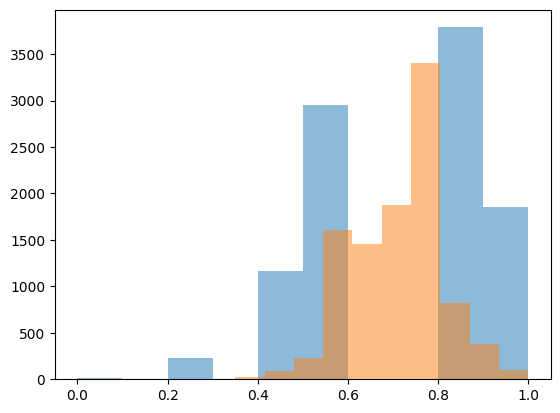

In [27]:
plt.hist(sample_props, alpha=0.5) # n=5
plt.hist(np.random.choice(students, (10000, 20)).mean(axis=1), alpha=0.5)

To recap this experiment, note a few things. Let $X$ be a random variable, $n$ be the sample size, $\mu$ be the population mean, and $\sigma^2$ be the population variance.

1. **Sampling distributions** are the **distribution of a statistic**.
    1. $\bar{X}$ is the sampling distribution of the sample mean.
1. The sampling distribution of the mean is centered on the original parameter value, $\bar{X} = \mu$.
1. The sampling distribution of the mean's variance decreases as the sampling size increases, $\sigma^2_{\bar{X}} = \frac{\sigma^2}{n}$.

### Notation

***Parameters*** pertain to a population and are typically annotated by Greek letters.  
***Statistics*** pertain to a sample are typically annotated by lowercase letters or the same Greek letter with a hat on it. These values will change depending on the sample(s) selected.

<u>**Mean**</u>  
Parameter - $\mu$.  
Statistic - $\bar{x}$ or $\hat{\mu}$

<u>**Standard Deviation**</u>  
Parameter - $\sigma$  
Statistic - $s$ or $\hat{\sigma}$

<u>**Variance**</u>  
Parameter - $\sigma^2$  
Statistic - $s^2$ or $\hat\sigma^2$

<u>**Proportion**</u> - (used for dataset with only 0 and 1 values - a proportion)  
Parameter - $\pi$  
Statistic - $p$ or $\hat\pi$

<u>**Regression Coefficient**</u>  
Parameter - $\beta$  
Statistic - $b$ or $\hat\beta$

<u>**Correlation Coefficient**</u>  
Parameter - $\rho$  
Statistic - $r$ or $\hat\rho$

### Law of Large Numbers

The ***law of large number*** states larger our sample size, the closer our statistic gets to the parameter.

### Central Limit Theorem

The ***Central Limit Theorem*** states, with a large enough sample size, the sampling distribution of the mean will be normally distributed.

The Central Limit Theorem actually applies to sample means ($\bar{x}$), sample proportions ($p$), difference in sample means ($\bar{x_1}-\bar{x_2}$), and difference in sample proportions ($p_1 - p_2$). However, it **does not apply for all statistics**, e.g., variance, correlation coefficient, or sampling distribution of the maximum value in a dataset.

##### Example - Central Limit Theorem Does Apply to the Mean

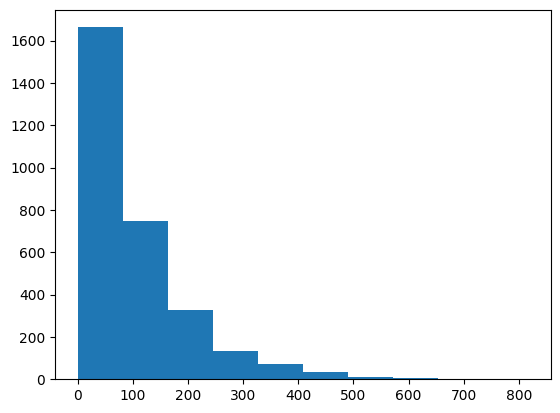

In [39]:
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data)

In [46]:
print('population mean: ', pop_data.mean())
print('population std: ', pop_data.std())
print('population var: ', pop_data.var())

population mean:  100.35978700795846
population std:  99.77860187968906
population var:  9955.76939306549


In [41]:
n = 3
sample = np.random.choice(pop_data, n)
sample.mean()

34.86585877838206

samples mean:  100.4014044887234
samples std:  9.859739652909264


(array([  32.,  296., 1048., 2284., 2791., 2052., 1042.,  359.,   83.,
          13.]),
 array([ 68.81184008,  75.79877872,  82.78571736,  89.772656  ,
         96.75959464, 103.74653328, 110.73347192, 117.72041056,
        124.7073492 , 131.69428784, 138.68122648]),
 <BarContainer object of 10 artists>)

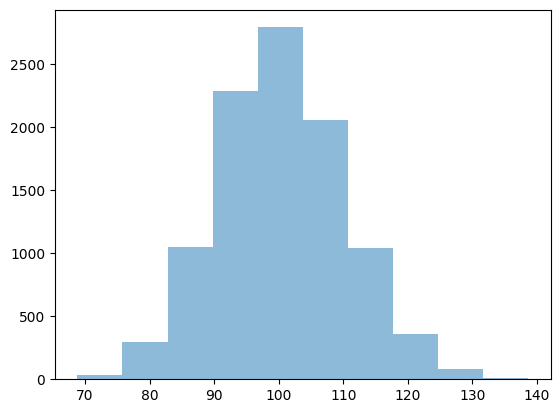

In [47]:
samples = np.random.choice(pop_data, (10000, n))
print('samples mean: ', samples.mean(axis=1).mean())
print('samples std: ', samples.mean(axis=1).std())
plt.hist(samples.mean(axis=1), alpha=0.5)

Note that the curve does not appear to be normally distributed. This is because $n=3$ is too small. This raises an important question for the central limit theorem. When is my sample size large enough such that I can use the central limit theorem? With the advent of computers, we can tend to avoid this question by simply running simulations.

Try again. This time with $n=100$.

In [43]:
n = 100
sample = np.random.choice(pop_data, n)
sample.mean()

97.58388178095666

samples mean:  100.42857672674262
samples std:  10.015923955914742


(array([  18.,  174.,  917., 2371., 3020., 2249.,  967.,  230.,   49.,
           5.]),
 array([ 64.8224653 ,  72.67923085,  80.5359964 ,  88.39276195,
         96.2495275 , 104.10629305, 111.9630586 , 119.81982414,
        127.67658969, 135.53335524, 143.39012079]),
 <BarContainer object of 10 artists>)

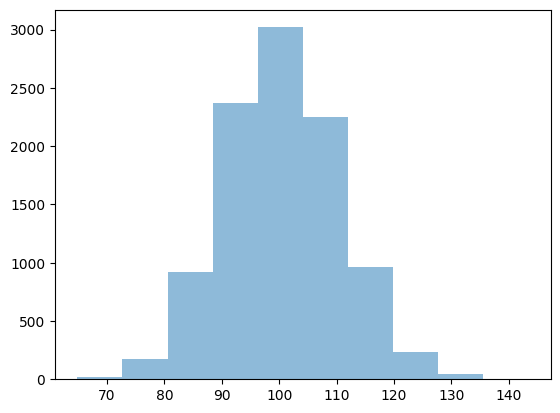

In [44]:
samples = np.random.choice(pop_data, (10000, n))
print('samples mean: ', samples.mean(axis=1).mean())
print('samples std: ', samples.mean(axis=1).std())
plt.hist(samples.mean(axis=1), alpha=0.5)

##### Example - Central Limit Theorem Does **NOT** Apply to Variance

(array([1663.,  747.,  329.,  134.,   73.,   34.,   13.,    5.,    0.,
           2.]),
 array([1.16348231e-03, 8.17255031e+01, 1.63449843e+02, 2.45174182e+02,
        3.26898522e+02, 4.08622862e+02, 4.90347201e+02, 5.72071541e+02,
        6.53795881e+02, 7.35520220e+02, 8.17244560e+02]),
 <BarContainer object of 10 artists>)

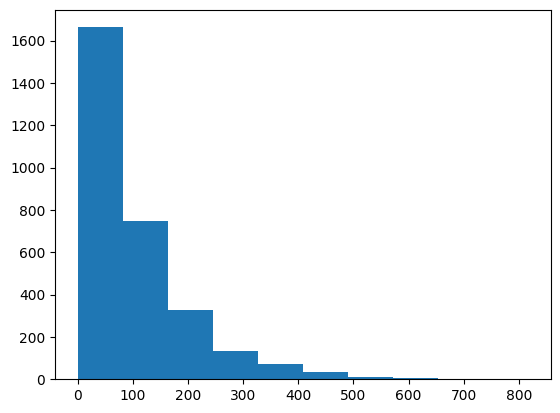

In [48]:
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data)

In [49]:
print('population mean: ', pop_data.mean())
print('population std: ', pop_data.std())
print('population var: ', pop_data.var())

population mean:  100.35978700795846
population std:  99.77860187968906
population var:  9955.76939306549


In [50]:
np.random.choice(pop_data, 100).var()

12098.749344943082

var_size_100 mean:  9837.260344570863
var_size_100 std:  2533.1328019241055
var_size_100 var:  6416761.79218387


(array([ 183., 1556., 3119., 2798., 1515.,  557.,  209.,   44.,   13.,
           6.]),
 array([ 3473.4861736 ,  5477.97530235,  7482.46443111,  9486.95355987,
        11491.44268862, 13495.93181738, 15500.42094614, 17504.91007489,
        19509.39920365, 21513.8883324 , 23518.37746116]),
 <BarContainer object of 10 artists>)

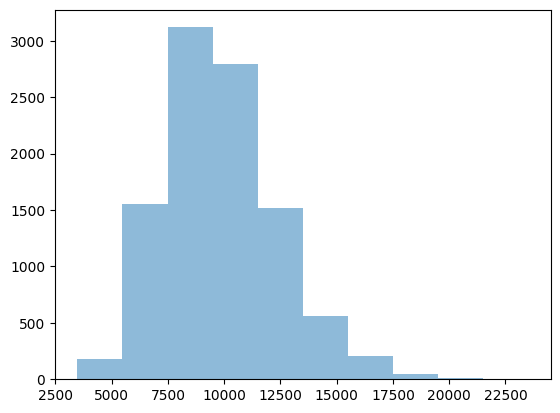

In [52]:
var_size_100 = np.random.choice(pop_data, (10000, 100)).var(axis=1)
print('var_size_100 mean: ', var_size_100.mean())
print('var_size_100 std: ', var_size_100.std())
print('var_size_100 var: ', var_size_100.var())
plt.hist(var_size_100, alpha=0.5)

Note that this distribution is right-skewed. This distribution actually approaches a distribution known as a chi-squared distribution.

### Bootstrapping

***Bootstrapping***, in statistics, means sampling with replacement.

We can use bootstrapping to simulate the creation of sampling distribution. This amazing technique allows us to gain a better understanding of a parameter without needing any more data.

[StackExchange - Why Bootstrapping Works](https://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works)

In [54]:
import numpy as np
np.random.seed(42)

die_vals = np.array([1,2,3,4,5,6])

With bootstrapping:

In [55]:
np.random.choice(die_vals, size=20)

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5, 4, 3, 6, 5, 2, 4, 6, 6, 2, 4])

Without bootstrapping:

In [56]:
np.random.choice(die_vals, size=20, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

##### Background of Bootstrapping

Bootstrapping is used in many leading machine learning algorithms such as random forests and stochastics gradient boosting. 